In [8]:
from matplotlib import pyplot as plt
import numpy as np
from numpy.random import default_rng

seed = 123
rng = default_rng(seed)


In [21]:
def random_tau(seed,n):
    """
    Generate random optical depth for the particle to move
    
    Returns:    
        float: optical depth
        
    """
    rng = default_rng(seed)
    eta_1 = rng.uniform(0, 1,n)
    tau = -np.log(1-eta_1)

    return tau

In [22]:
#how many random numbers to pull?
n_random = 100000

#generate random optical depths
tau = random_tau(seed,n_random)
print(tau.max(),tau.min())

12.457749451835612 1.6087449116568656e-05


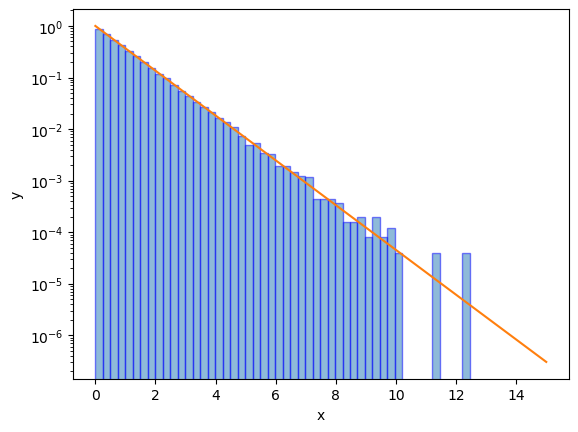

In [23]:
#how many bins to use?
nbins = 50

#use matplotlib.pyplot.hist
n,bins,patches = plt.hist(tau,bins=nbins,density=True,ec="blue",alpha=0.5)

#overplot a line
xx = np.linspace(0,15,1000)
yy = np.exp(-xx)
plt.plot(xx,yy)
plt.yscale('log')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
